In [ ]:
# adapted from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

import pandas as pd
import tensorflow as tf

# fix random seed for reproducibility
tf.random.set_seed(7)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_parquet("../data/time_slices.parquet")

X = df.drop(["winner", "season", "game"], axis=1)
y = df["winner"]

encoder = LabelEncoder()
y = encoder.fit_transform(y)  # convert "home" and "away" to categories

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=42
)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Input
from keras.models import Sequential
from matplotlib import pyplot

early_stopping = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)

model = Sequential([
    Input(shape=(1, 1)),
    LSTM(16),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam')

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

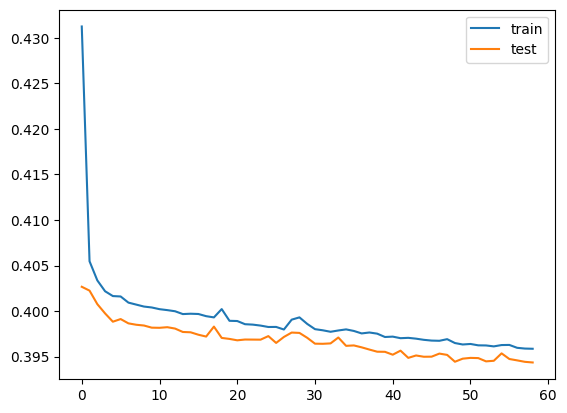

In [4]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [5]:
model.save("models/meter_lstm16d2.keras")